In [1]:
# Basic Analysis
# Interaction Time, # Sessions, % Engagaed, Engagement by Session, Continuous Engagement

In [2]:
import pandas as pd
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt

In [4]:
p5_file = '../../../../Google Drive File Stream/My Drive/USC Expeditions Year 5/Analysis/Engagement/Data/Master/p5_master.csv'
p7_file = '../../../../Google Drive File Stream/My Drive/USC Expeditions Year 5/Analysis/Engagement/Data/Master/p7_master.csv'
p9_file = '../../../../Google Drive File Stream/My Drive/USC Expeditions Year 5/Analysis/Engagement/Data/Master/p9_master.csv'
p11_file = '../../../../Google Drive File Stream/My Drive/USC Expeditions Year 5/Analysis/Engagement/Data/Master/p11_master.csv'
p12_file = '../../../../Google Drive File Stream/My Drive/USC Expeditions Year 5/Analysis/Engagement/Data/Master/p12_master.csv'
p17_file = '../../../../Google Drive File Stream/My Drive/USC Expeditions Year 5/Analysis/Engagement/Data/Master/p17_master.csv'
p18_file = '../../../../Google Drive File Stream/My Drive/USC Expeditions Year 5/Analysis/Engagement/Data/Master/p18_master.csv'

data5 = pd.read_csv(p5_file)
data7 = pd.read_csv(p7_file)
data9 = pd.read_csv(p9_file)
data11 = pd.read_csv(p11_file)
data12 = pd.read_csv(p12_file)
data17 = pd.read_csv(p17_file)
data18 = pd.read_csv(p18_file)

/anaconda3/envs/caispp/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/envs/caispp/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (37,38,39,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/envs/caispp/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/envs/caispp/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=inte

In [18]:
data = [data5, data7, data9, data11, data12, data17, data18]
all_data = pd.concat(data)
part = [5, 7, 9, 11, 12, 16, 17]

In [11]:
# Interaction Time

def breakdown(total):
    hrs = int(total/3600)
    
    total = total%3600
    minutes = int(total/60)
    
    total = total%60
    seconds = round(total)

    return (hrs, minutes, seconds)
  

grand = 0
for p, d in enumerate(data):
    total = (len(d)*(0.1/3))
    grand += total
    
    print(part[p], breakdown(total))
print()
print('average', breakdown(grand/4))
print('total', breakdown(grand))

5 (1, 47, 49)
7 (2, 47, 47)
9 (3, 7, 23)
11 (3, 11, 48)
12 (2, 10, 4)
17 (1, 46, 38)
18 (2, 37, 28)

average (4, 22, 14)
total (17, 28, 58)


In [12]:
# Sessions

grand = 0
for p, d in enumerate(data):
    total = len((d['session_num'].unique()))
    grand += total
    
    print(part[p], total)
print()
print('average', int(grand/4))
print('total', grand)

5 5
7 8
9 5
11 9
12 5
17 4
18 15

average 12
total 51


In [13]:
# Engagement By Participant 
engagement_record = []

for p, d in enumerate(data):
    counts = d['engagement'].value_counts()
    engagement = (counts[1]/len(d))*100
    engagement_record.append(engagement)
    
    print(part[p], round(engagement, 3), end='%\n')

print('average', round(sum(engagement_record)/4, 3), end='%\n')

all_counts = all_data['engagement'].value_counts()
all_engagement = (all_counts[1]/len(all_data))*100
print('total', round(all_engagement, 3), end='%\n')

5 84.32%
7 59.813%
9 49.086%
11 76.61%
12 64.487%
17 47.891%
18 76.779%
average 114.747%
total 65.402%


In [14]:
# Engagement By Session 
session_record = []

for p, d in enumerate(data):
    sessions = d['session_num'].unique()
    sessions = sorted(sessions)
    
    inner = []
    for s in sessions:
        curr = d.loc[d['session_num']==s]
        counts = curr['engagement'].value_counts()
        inner.append(counts[1]/len(curr))
    session_record.append(inner)
    
    
session_std = []
total = []
for i in session_record:
    std = np.std(i)
    print(round(std*100, 3), end='%\n')
    session_std.append(std*100)
    total += i

print('average', round(np.mean(session_std)*100, 3), end='%\n')
print('total', round(np.std(total)*100, 3), end='%\n')

9.116%
18.242%
7.699%
9.817%
9.66%
10.499%
11.154%
average 1088.395%
total 16.421%


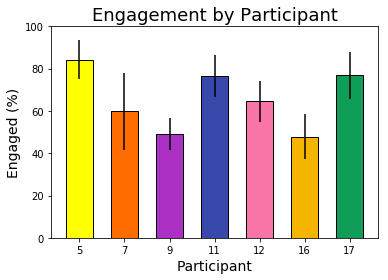

In [16]:
# Engagement by Participant Graph
# StDev Between Sessions as Error Bars

plt.rcParams["figure.figsize"] = [5.5,4]

fig, ax = plt.subplots()
index = np.arange(len(data))
bar_width = 0.6

rects1 = ax.bar(index, engagement_record, bar_width, yerr=session_std, edgecolor='k', color=['#FFFF00', '#ff6d00', '#ab30c4', '#3949ab', '#f975a8', '#f4b400', '#0f9d58']
               )

ax.set_xlabel('Participant', fontsize=14)
ax.set_ylabel('Engaged (%)', fontsize=14)
ax.set_title('Engagement by Participant', fontsize=18)
plt.ylim(0, 100)

ax.set_xticks(index)
ax.set_xticklabels(('5', '7', '9', '11', '12', '16', '17'))
fig.tight_layout()

plt.show()
fig.savefig('figure.eps', format='eps', dpi=1000)

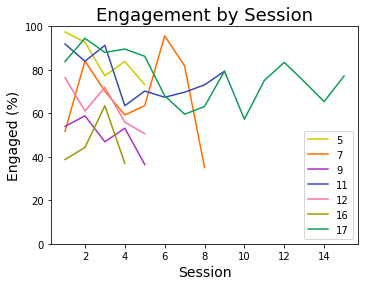

In [21]:
# Engagement By Session
plt.rcParams["figure.figsize"] = [5.5,4]
color=['#CCCC00', '#ff6d00', '#ab30c4', '#3949ab', '#f975a8', '#999900', '#0f9d58']
fig, ax = plt.subplots()

longest = 0
for i in session_record:
    longest = max(longest, len(i))

index = list(range(1, longest+1))
for p,i in enumerate(session_record):
    need = np.empty(longest-len(i))
    need[:] = np.nan
    new = np.hstack((np.array(i), need))
    plt.plot(index, new*100, label=str(part[p]), color=color[p])
    
ax.set_xlabel('Session', fontsize=14)
ax.set_ylabel('Engaged (%)', fontsize=14)
ax.set_title('Engagement by Session', fontsize=18)
plt.ylim(0, 100)

plt.legend(loc='best')
fig.savefig('figure2.eps', format='eps', dpi=1000)

In [49]:
# Continuous Engagement and Disengagement

cont_en = []
cont_dis = []

cont_en_std = []
cont_dis_std = []

for i, d in enumerate(data):
    curr = 0
    last = d.loc[0, 'engagement']
    last_sess = d.loc[0, 'session_num']
    
    track_en = []
    track_dis = []
    
    for j,r in d.iterrows():
        if (last != r['engagement']) or (last_sess != r['session_num']):
            #record this
            if (last == 0):
                track_dis.append(curr)
            else:
                track_en.append(curr)
            
            curr = 0
            last = r['engagement']
            last_sess = r['session_num']
            
        curr+= 1
    
    # grab last one 
    if (last == 0):
        track_dis.append(curr)
    else:
        track_en.append(curr)
    
    # Median Continuous 
    en = (np.median(track_en)/30)   
    print(round(en, 3))
    cont_en.append(en)
    
    dis = (np.median(track_dis)/30)
    print(round(dis, 3))
    cont_dis.append(dis)
    
    # St Dev Continuous 
    en_std = (np.std(track_en)/30)
    print(round(en_std, 3))
    cont_en_std.append(en_std)
    
    dis_std = (np.std(track_dis)/30)
    print(round(dis_std, 3))
    cont_dis_std.append(dis_std)

print(np.mean(cont_en))
print(np.mean(cont_dis))
print(np.mean(cont_en_std))
print(np.mean(cont_dis_std))

13.083
3.067
51.485
157.101
20.467
6.5
34.42
150.671
11.783
4.367
31.527
37.711
14.267
6.667
30.608
79.309


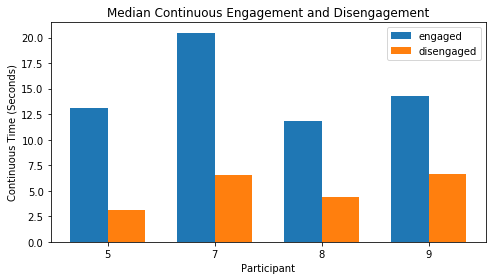

In [53]:
# Continuous Engagement Graph

plt.rcParams["figure.figsize"] = [7,4]

fig, ax = plt.subplots()

index = np.arange(len(part))
bar_width = 0.35

rects1 = ax.bar(index, cont_en, bar_width, label='engaged')
rects2 = ax.bar(index+bar_width, cont_dis, bar_width, label='disengaged')

ax.set_xlabel('Participant')
ax.set_ylabel('Continuous Time (Seconds)')
ax.set_title('Median Continuous Engagement and Disengagement')

ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('5', '7', '8', '9'))
ax.legend()
fig.tight_layout()

plt.show()

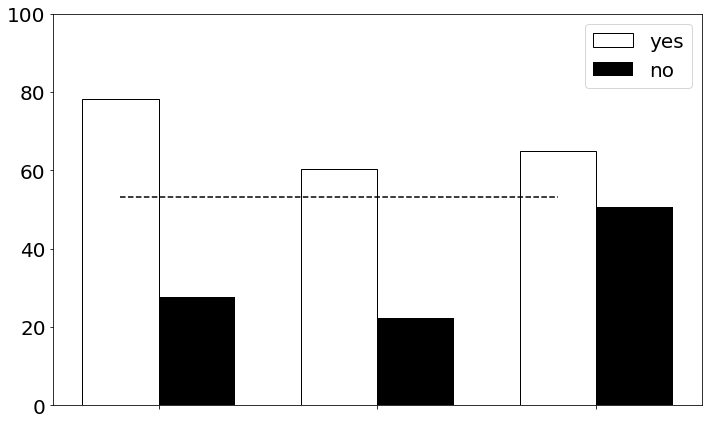

In [56]:
# Robot Talking / Not Talking
# During Games / Not During Games
# Open Face Success / Open Face Failure 


plt.rcParams["figure.figsize"] = [10,6]

fig, ax = plt.subplots()

index = np.arange(3)
bar_width = 0.35

rects1 = ax.bar(index, [78.341, 60.356, 65.048], bar_width, color="w", edgecolor="k", label='yes')
rects2 = ax.bar(index+bar_width, [27.544, 22.245, 50.580], bar_width, color="k", label='no')

threshold = 53.137
ax.plot([0, 2], [threshold, threshold], "k--")

plt.tick_params(axis='both', which='major', labelsize=20)
plt.ylim(0, 100)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('', '', ''))
ax.legend(prop={'size': 20})

fig.tight_layout()

plt.show()